In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Example

## Define the dataset and dataloader

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

def get_vis_loader():
    transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                              shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                             shuffle=False, num_workers=2)
    return trainloader, testloader

def get_train_loader(batch_size, transform):
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)
    return trainloader
    
def get_test_loader(batch_size, transform):
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)
    return testloader
    
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

vistrainloader, vistestloader = get_vis_loader()
trainloader = get_train_loader(batch_size, transform)
testloader = get_test_loader(batch_size, transform)

100%|██████████| 170498071/170498071 [00:16<00:00, 10425936.67it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Visualization

Let us show some of the training images, for fun.



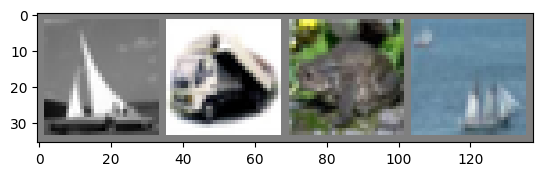

 ship truck  frog  ship


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(vistrainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Define training code

In [ ]:
def forward_step(net, inputs, labels):
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    return outputs, loss, labels


def train(net, loader, optimizer, max_epoch):
    net.train()
    N = len(loader)
    print_interval = (N // 8 // 100 + 1) * 100
    for epoch in range(max_epoch):  # loop over the dataset multiple times

        running_loss = 0.0
        running_acc = 0.0
        for i, data in enumerate(loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs, loss, labels = forward_step(net, inputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            running_acc += accuracy(outputs, labels).item()
            if (i + 1) % print_interval == 0:
                print('Epoch: [%d / %d], batches: [%d / %d], loss: %.3f, acc: %.2f' %
                      (epoch + 1, max_epoch, i + 1, N, 
                       running_loss / print_interval, 100 * running_acc / print_interval))
                running_loss = 0.0
                running_acc = 0.0

    print('Finished Training')

## Training on GPU?

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cpu


The rest of this section assumes that ``device`` is a CUDA device.

## Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
train(fc_net, trainloader, optimizer, 5)

## Let's quickly save our trained model:



In [ ]:
PATH = './checkpoints/cifar_net.pth'

def save_model(net, path):
    torch.save(net.state_dict(), path)
    
save_model(fc_net, PATH)

## Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



In [ ]:
dataiter = iter(vistestloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Load a model
Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [ ]:
net = NeuralNet()

def load_model(net, path):
    net.load_state_dict(torch.load(PATH))
    
load_model(net, PATH)

Okay, now let us see what the neural network thinks these examples above are:



# Your turn now!

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

def get_vis_loader():
    transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                              shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                             shuffle=False, num_workers=2)
    return trainloader, testloader

def get_train_loader(batch_size, transform):
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)
    return trainloader
    
def get_test_loader(batch_size, transform):
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)
    return testloader
    
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

vistrainloader, vistestloader = get_vis_loader()
trainloader = get_train_loader(batch_size, transform)
testloader = get_test_loader(batch_size, transform)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Define a Convolutional Neural Network

The architecture should be:

    conv2d, 5x5, 3->8, padding=2

    Relu()

    conv2d, 5x5, 8->16, padding=2, stride=2

    Relu()

    conv2d, 5x5, 16->32, padding=2
    
    Relu()

    conv2d, 5x5, 32->64, padding=2, stride=2
    
    Relu()

    conv2d, 5x5, 64->128, padding=2

    maxpool2d

    Relu()

    flatten the feature map

    fc, the whole feature map -> 120

    Relu()

    fc, 120->84

    Relu()

    fc, 84->10
    

In [10]:
class ConvolutionNet(nn.Module):
    def __init__(self):
        super(ConvolutionNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=5, padding=2, stride=2)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=5, padding=2, stride=2)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        # 使用dummy tensor来计算全连接层的输入维度
        self._to_linear = None
        self.convs(torch.randn(1, 3, 32, 32))  # 初始化_fc_input_size
        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def convs(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = self.pool(x)

        # 自动计算特征图的尺寸
        if self._to_linear is None:
            self._to_linear = x.numel()  # 获取展平后的元素数量
        return x


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


## Train the convolutional neural network

Train this CNN with learning rate 1e-2 for 5 epochs.

You should see the training loss is aroung 0.9 and accuracy is around 67%.

In [12]:
def forward_step(net, inputs, labels, device):
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    return outputs, loss, labels

def train(net, loader, optimizer, max_epoch, device):
    net.train()
    N = len(loader)
    print_interval = (N // 8 // 100 + 1) * 100
    for epoch in range(max_epoch):
        running_loss = 0.0
        running_acc = 0.0
        for i, data in enumerate(loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, loss, labels = forward_step(net, inputs, labels, device)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            running_acc += accuracy(outputs, labels).item()
            if (i + 1) % print_interval == 0:
                print(f'Epoch: [{epoch + 1}/{max_epoch}], Batches: [{i + 1}/{N}], '
                      f'Loss: {running_loss / print_interval:.3f}, Acc: {100 * running_acc / print_interval:.2f}%')
                running_loss = 0.0
                running_acc = 0.0
    print('Finished Training')

## Test the convolutional neural network

Test this CNN on the test dataset.

You should see the accuracy is around 62%.

In [14]:
def test(net, testloader, device):
    correct = 0
    total = 0
    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

## Accuracy (each class) of CNN

Test this CNN on the test dataset to see the accuracy of each class.

In [16]:
def accuracy(output, target):
    pred = output.max(1, keepdim=True)[1]
    return pred.eq(target.view_as(pred)).float().mean()
def class_test(net, testloader, classes, device):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    for classname, correct_count in correct_pred.items():
        acc = 100 * float(correct_count) / total_pred[classname]
        print(f"Accuracy for class {classname:5s} is: {acc:.1f} %")

## train the network

In [18]:
vistrainloader, vistestloader = get_vis_loader()
trainloader = get_train_loader(batch_size, transform)
testloader = get_test_loader(batch_size, transform)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ConvolutionNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
train(model, trainloader, optimizer, 5, device)
test(model, testloader, device)
class_test(model, testloader, classes, device)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: [1/5], Batches: [100/782], Loss: 2.303, Acc: 10.81%
Epoch: [1/5], Batches: [200/782], Loss: 2.304, Acc: 9.23%
Epoch: [1/5], Batches: [300/782], Loss: 2.303, Acc: 8.91%
Epoch: [1/5], Batches: [400/782], Loss: 2.302, Acc: 10.28%
Epoch: [1/5], Batches: [500/782], Loss: 2.286, Acc: 12.23%
Epoch: [1/5], Batches: [600/782], Loss: 2.166, Acc: 18.38%
Epoch: [1/5], Batches: [700/782], Loss: 2.082, Acc: 21.89%
Epoch: [2/5], Batches: [100/782], Loss: 1.985, Acc: 23.52%
Epoch: [2/5], Batches: [200/782], Loss: 1.926, Acc: 26.23%
Epoch: [2/5], Batches: [300/782], Loss: 1.867, Acc: 28.36%
Epoch: [2/5], Batches: [400/782], Loss: 1.815, Acc: 30.17%
Epoch: [2/5], Batches: [500/782], Loss: 1.788, Acc: 31.73%
Epoch: [2/5], Batches: [600/782], Loss: 1.711, Acc: 34.52%
Epoch: [2/5], Batches: [700/782], Loss: 1.650, Acc: 37.62%
Epoch: [3/5], Batches: [

## Let's use BN

Add BatchNorm2d to the convolution neural network you implemented.

You should add batchnorm after the convolution operator and before the activation layer.

Please train this network and show the test accuracy.

In [20]:
class ConvolutionBNNet(nn.Module):
    def __init__(self):
        super(ConvolutionBNNet, self).__init__()
        # Adding Conv layers with BatchNorm
        self.conv1 = nn.Conv2d(3, 8, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(8)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=5, padding=2, stride=2)
        self.bn2 = nn.BatchNorm2d(16)

        self.conv3 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm2d(32)

        self.conv4 = nn.Conv2d(32, 64, kernel_size=5, padding=2, stride=2)
        self.bn4 = nn.BatchNorm2d(64)

        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Use kernel_size=3 to reduce size reduction
        self.bn5 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)

        # Adjust the dummy input size to batch size of 4
        self._to_linear = None
        self.convs(torch.randn(4, 3, 32, 32))  # Dummy input for size calculation

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def convs(self, x):
        # Pooling only on selected layers to prevent too much size reduction
        x = F.relu(self.bn1(self.conv1(x)))  # Conv1 + BN + ReLU
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Conv2 + BN + Pooling
        x = F.relu(self.bn3(self.conv3(x)))  # Conv3 + BN
        x = self.pool(F.relu(self.bn4(self.conv4(x))))  # Conv4 + BN + Pooling
        x = F.relu(self.bn5(self.conv5(x)))  # Conv5 + BN (no pooling to prevent too much reduction)

        if self._to_linear is None:
            self._to_linear = x[0].numel()  # Get the flattened size for FC layer

        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Train the CNN with BN

Train this CNN with learning rate 1e-2 for 5 epochs.

In [21]:
# Train function
# Define the model, optimizer, and loss function
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_bn = ConvolutionBNNet().to(device)
optimizer_bn = optim.SGD(model_bn.parameters(), lr=1e-2, momentum=0.9)
criterion_bn = nn.CrossEntropyLoss()

def forward_step(net, inputs, labels, device):
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    return outputs, loss, labels

# Training the CNN with BatchNorm for 5 epochs
def train_bn(net, loader, optimizer, max_epoch, device):
    net.train()
    for epoch in range(max_epoch):
        running_loss = 0.0
        for i, data in enumerate(loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion_bn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f'Epoch [{epoch + 1}/{max_epoch}] - Loss: {running_loss / len(loader):.4f}')

    print('Finished Training with BatchNorm')

## Test the CNN with BN

Test this CNN on the test dataset.

In [22]:
def test_bn(net, testloader, device):
    correct = 0
    total = 0
    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')
    return accuracy
def class_test_bn(net, testloader, classes, device):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    for classname, correct_count in correct_pred.items():
        acc = 100 * float(correct_count) / total_pred[classname]
        print(f"Accuracy for class {classname:5s} is: {acc:.1f} %")


## Accuracy (each class) of CNN with BN

Test this CNN with BNN on the test dataset to see the accuracy of each class.

In [23]:
def accuracy(output, target):
    pred = output.max(1, keepdim=True)[1]
    return pred.eq(target.view_as(pred)).float().mean()



## train the network

In [24]:
# Data loaders
vistrainloader, vistestloader = get_vis_loader()
trainloader = get_train_loader(batch_size, transform)
testloader = get_test_loader(batch_size, transform)
# Instantiate model and set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ConvolutionBNNet().to(device)
# Set optimizer and criterion
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
# Train the model with BatchNorm
train_bn(model_bn, trainloader, optimizer_bn, 5, device)
# Test the model with BatchNorm
test_bn(model_bn, testloader, device)
# Check class-wise accuracy
class_test_bn(model_bn, testloader, classes, device)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch [1/5] - Loss: 1.4244
Epoch [2/5] - Loss: 0.9979
Epoch [3/5] - Loss: 0.8416
Epoch [4/5] - Loss: 0.7408
Epoch [5/5] - Loss: 0.6704
Finished Training with BatchNorm
Accuracy of the network on the 10000 test images: 71.45%
Accuracy for class plane is: 71.7 %
Accuracy for class car   is: 79.9 %
Accuracy for class bird  is: 52.8 %
Accuracy for class cat   is: 50.1 %
Accuracy for class deer  is: 81.7 %
Accuracy for class dog   is: 65.8 %
Accuracy for class frog  is: 71.6 %
Accuracy for class horse is: 79.3 %
Accuracy for class ship  is: 83.1 %
Accuracy for class truck is: 78.5 %


## save resnet model

In [ ]:
PATH = './checkpoints/bnnet.pth'

def save_model(net, path):
    torch.save(net.state_dict(), path)
    
save_model(fc_net, PATH)

## test the network on the test data

In [ ]:
dataiter = iter(vistestloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## load the model

In [ ]:
net = NeuralNet()

def load_model(net, path):
    net.load_state_dict(torch.load(PATH))
    
load_model(net, PATH)

## Design by yourself--ResNet
Now, based on the knowledge learned in class or by referring to online resources, you can design your own network architecture or incorporate other optimization methods to improve task performance. Please provide at least one improvement strategy.

### Define the Net

In [12]:
'''
Implement here
'''
# Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # 跳跃连接（shortcut connection），如果尺寸不同则调整
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.shortcut(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity  # 残差连接
        return F.relu(out)


# ResNet with 3 Residual Blocks
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)

        # Residual layers
        self.layer1 = self._make_layer(64, 128, stride=2)
        self.layer2 = self._make_layer(128, 256, stride=2)
        self.layer3 = self._make_layer(256, 512, stride=2)

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def _make_layer(self, in_channels, out_channels, stride):
        return ResidualBlock(in_channels, out_channels, stride)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

    

### Training the CNN with BatchNorm for 5 epochs

In [13]:
# Define the optimizer, scheduler, and loss function
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_resnet = ResNet().to(device)
optimizer = optim.SGD(model_resnet.parameters(), lr=1e-2, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
criterion = nn.CrossEntropyLoss()
# Training the CNN with BatchNorm for 5 epochs
def train_bn(net, loader, optimizer, max_epoch, device):
    net.train()
    for epoch in range(max_epoch):
        running_loss = 0.0
        for i, data in enumerate(loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f'Epoch [{epoch + 1}/{max_epoch}] - Loss: {running_loss / len(loader):.4f}')

    print('Finished Training with BatchNorm')

### Test function (same as before)

In [14]:
# Testing the CNN with BatchNorm
def test_bn(net, testloader, device):
    correct = 0
    total = 0
    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')
    return accuracy
# Testing per class accuracy
def class_test_bn(net, testloader, classes, device):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    for classname, correct_count in correct_pred.items():
        acc = 100 * float(correct_count) / total_pred[classname]
        print(f"Accuracy for class {classname:5s} is: {acc:.1f} %")


### Accuracy (each class) of CNN with BN

Test this CNN with BNN on the test dataset to see the accuracy of each class.

In [15]:
def accuracy(output, target):
    pred = output.max(1, keepdim=True)[1]
    return pred.eq(target.view_as(pred)).float().mean()



### train the network

In [ ]:
# Data loaders
vistrainloader, vistestloader = get_vis_loader()
trainloader = get_train_loader(batch_size, transform)
testloader = get_test_loader(batch_size, transform)
# Instantiate model and set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_resnet = ResNet().to(device)
# Set optimizer and criterion
optimizer = optim.SGD(model_resnet.parameters(), lr=1e-2, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Train the model
train_bn(model_resnet, trainloader, optimizer, 20, device)
# Test the model
test_bn(model_resnet, testloader, device)
# Class-wise accuracy
class_test_bn(model_resnet, testloader, classes, device)



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### save resnet model

In [ ]:
PATH = './checkpoints/resnet.pth'

def save_model(net, path):
    torch.save(net.state_dict(), path)
    
save_model(fc_net, PATH)

### test the network on the test data

In [ ]:
dataiter = iter(vistestloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

### load the model

In [ ]:
net = NeuralNet()

def load_model(net, path):
    net.load_state_dict(torch.load(PATH))
    
load_model(net, PATH)